In [8]:
import networkx as nx
A = nx.Graph()
A.add_edges_from([(1,2),(1,3),(1,4),(2,4),(2,5),(4,6)])
print(nx.average_clustering(G)) 

0.16666666666666666


/home/cyrillefeudjio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


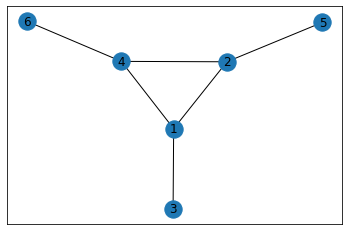

In [140]:
nx.draw_networkx(A)

In [165]:
import networkx as nx
A = nx.Graph()
B = nx.DiGraph()
A.add_edges_from([(1,2),(1,3),(1,4),(2,4),(2,5),(4,6)])
B.add_nodes_from([4])
B.add_edges_from([(1,7),(2,1),(3,1),(3,5),(6,5),(7,1),(7,6),(3,2)])

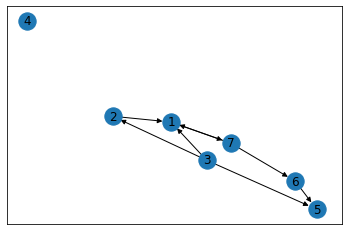

In [171]:
nx.draw_networkx(B)

In [144]:
#function to count the number of cycle 
def count_cycle(G,l):
    c=nx.find_cycle(G, source=None, orientation ='ignore')
    count=0
    for i in c:
        if len(c)==l:
            count=count+1
    return count

In [184]:
count_cycle(A,4)

0

In [185]:
count_cycle(B,4)

0

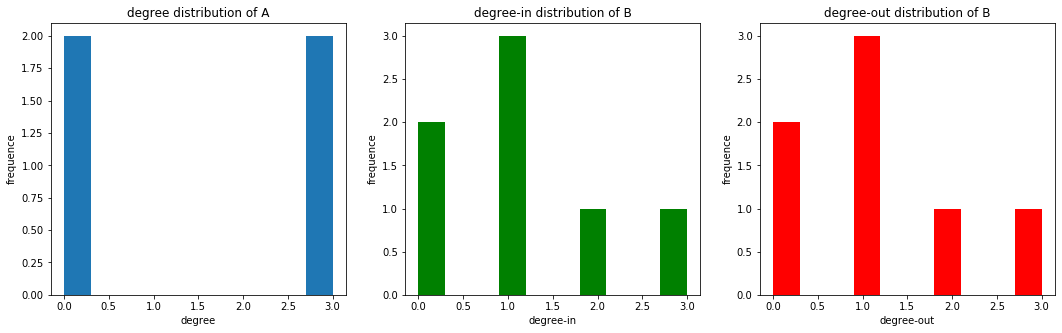

In [187]:
import networkx as nx
import matplotlib.pyplot as plt
# degree of A
D1=nx.degree_histogram(A)
# degree in of B
Bin=B.in_degree()
# degree out of B
Bout=B.out_degree()
# return each in-degre with and the number of it
din,cin=zip(*Bin)
# return each out-degre with and the number of it
dout,cout=zip(*Bout)
#plot the different graph
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.hist(D1)
plt.title('degree distribution of A')
plt.xlabel('degree')
plt.ylabel('frequence')
plt.subplot(1,3,2)
plt.hist(list(cin),color='g')
plt.title('degree-in distribution of B')
plt.xlabel('degree-in')
plt.ylabel('frequence')
plt.subplot(1,3,3)
plt.hist(list(cout),color='r')
plt.title('degree-out distribution of B')
plt.xlabel('degree-out')
plt.ylabel('frequence')
plt.show()


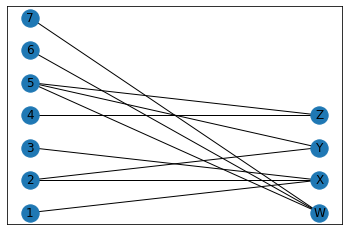

In [177]:
import networkx as nx
from networkx.algorithms import bipartite
H=nx.Graph()
H.add_nodes_from([k for k in range(1,8)],bipartite=0)
H.add_nodes_from(['X','Y','Z','W'],bipartite=1)
H.add_edges_from([(1,'X'),(2,'X'),(2,'Y'),(3,'X'),(4,'Z'),(5,'Y'),(5,'Z'),(5,'W'),(6,'W'),(7,'W')])
l1, l2 = nx.bipartite.sets(H)
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l1))
pos.update((node, (2, index)) for index, node in enumerate(l2))
nx.draw_networkx(H, pos=pos)
plt.show()

In [115]:
C=nx.adjacency_matrix(H)
print(C.todense())

[[0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]]


/home/cyrillefeudjio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


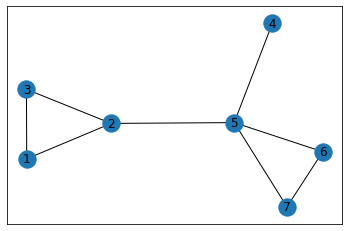

In [188]:
V1=bipartite.projected_graph(H,[i for i in range (1,8)])
nx.draw_networkx(V1)

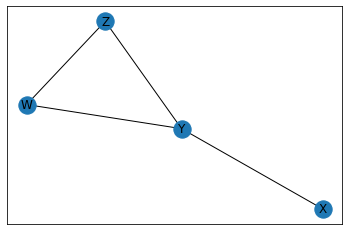

In [128]:
V2=bipartite.projected_graph(H,['X','Y','Z','W'])
nx.draw_networkx(V2)

In [138]:
Av1=nx.adjacency_matrix(V1)
print(Av1.todense())

[[0 1 1 0 0 0 0]
 [1 0 1 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]


In [139]:
Av2=nx.adjacency_matrix(V2)
print(Av2.todense())

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 1]
 [0 1 1 0]]


In [214]:
degY, degR = bipartite.degrees(H, [1,2,3,4,5,6,7])
degY=dict(degY)
degR=dict(degR)
average_yll=0
average_red=0
l1=['X','Y','Z','W']
l2=[1,2,3,4,5,6,7]
sum1=0
sum2=0
for i in l1: 
    sum1=sum1+degY[i]
for i in l2:
    sum2=sum2+degR[i]
average_yll=sum1/len(l1)
average_red=sum2/len(l2)
print('average degree of yellow node is:',average_yll)
print('average degree of red node is:',average_red)

average degree of yellow node is: 2.5
average degree of red node is: 1.4285714285714286


In [226]:
dV1=dict(nx.degree(V1))
dV2=dict(nx.degree(V2))
l1=['X','Y','Z','W']
l2=[1,2,3,4,5,6,7]
sum1=0
sum2=0
for i in l2: 
    sum1=sum1+dV1[i]
for i in l1:
    sum2=sum2+dV2[i]
print('average degree of V1 is:',sum1/len(l2))
print('average degree of V2 is:',sum2/len(l1))

average degree of V1 is: 2.2857142857142856
average degree of V2 is: 2.0
